In [1]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np



In [3]:
config_file = "model/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "model/frozen_inference_graph.pb"

In [24]:
model = cv2.dnn.readNetFromTensorflow(frozen_model, config_file)
# model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels = []    
file_name = "model/labels.txt"
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip("\n").split("\n")

In [28]:
classLabels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [29]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

AttributeError: 'cv2.dnn.Net' object has no attribute 'setInputSize'

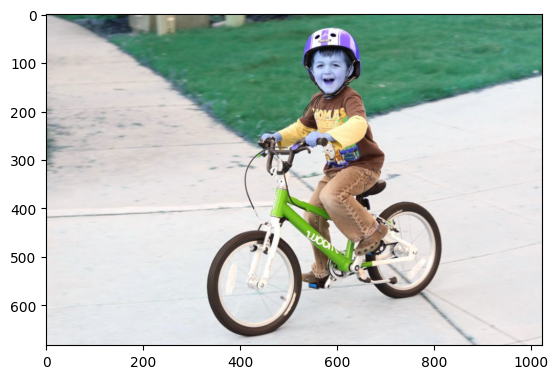

In [30]:
img = cv2.imread("b.jpg")
plt.imshow(img)

In [5]:
net = cv2.dnn.readNetFromTensorflow(frozen_model, config_file)

image_path = "b.jpg"
image = cv2.imread(image_path)

blob = cv2.dnn.blobFromImage(image, size=(320, 320), swapRB=True, crop=False)

# Set the input to the network
net.setInput(blob)

# Perform object detection
detections = net.forward()

# Loop over the detections and draw bounding boxes
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * \
            np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
        (x, y, w, h) = box.astype("int")
        cv2.rectangle(image, (x, y), (w, h), (0, 255, 0), 2)

# Display the image with bounding boxes
cv2.imshow("Object Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

: 

In [31]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.5)

AttributeError: 'cv2.dnn.Net' object has no attribute 'detect'

In [10]:
ClassIndex

NameError: name 'ClassIndex' is not defined

In [16]:
classLabels[2]

'car'

In [17]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[1]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

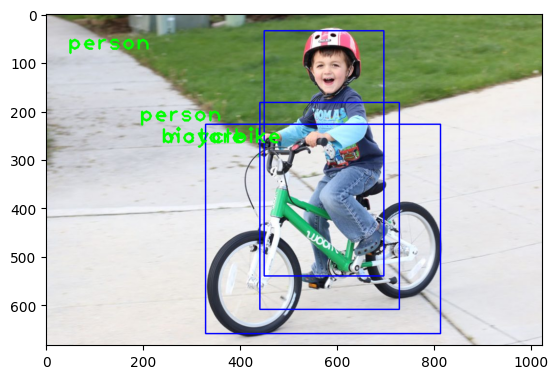

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
cap = cv2.VideoCapture("a.mp4")

while True:
    # Read the frame
    ret, frame = cap.read()
    
    # Resize the frame
    frame = imutils.resize(frame, width=500)
    
    # Pass the frame to the object detection model
    blob = cv2.dnn.blobFromImage(frame, 0.007843, (500, 500), 127.5)
    model.setInput(blob)
    detections = model.forward()
    
    # Loop through the detections
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        
        # Filter out weak detections
        if confidence > 0.5:
            # Get the bounding box coordinates
            box = detections[0, 0, i, 3:7] * np.array([500, 500, 500, 500])
            (startX, startY, endX, endY) = box.astype('int')
            
            # Draw the bounding box and label on the frame
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
            label = '{:.2f}%'.format(confidence * 100)
            cv2.putText(frame, label, (startX, startY - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Show the frame
    cv2.imshow('Object Detection', frame)
    
    # Check for key presses
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
        
# Release the video capture object and close all windows
cap.release()


: 

In [18]:
# Video
cap = cv2.VideoCapture("a.mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open the videos")  

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.55)
    print(ClassIndex)
    if len(ClassIndex)!=0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if ClassInd <= 80 :
                cv2.rectangle(img, boxes, (255,0,0),2)
                cv2.putText(img,classLabels[ClassInd-1],(boxes[1]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

    cv2.imshow("OBJ", frame)     
    if cv2.waitKey(2) & 0xff == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()    

()
()
()
()
()
()
()
[10]
[10]
[10]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[13]
[13]
[13]
[13]
[13]
()
()
()
()
()
()
[1 1]
[1]
[1]
[1]
[1 1]
[1 1]
[1]
[1]
[28  1 28]
[1 1]
[ 1 28]
[28  1]
[28 28 28 28]
[28 28 28]
[28 28 28]
[28 28 28 28]
[28 28 28]
[28 28 28]
[28 28]
[28]
[28 28 28]
[28]
()
()
()
()
()
()
()
()
[86 49]
[49]
[86 64]
[64 86 49]
[86 64 49]
[86 64 49]
[86 64]
[64 86]
[64]
[86 64]
[86 64 47]
[86 64 47]
[86 64 47]
[86 47]
[86 64]
[64 86]
()
()
()
()
()
()
()
()
()
[47]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[8]
[8]
[8]
()
()
()
[8]
[8]
()
[6]
[6]
[8]
[8]
[8]
[6]
()
()
()
[6]
[6]
()
[8]
()
()
[8 1]
[8 1]
[8]
[8 6]
[8]
[8]
[8]
[8]


: 